# Algoritmos Genéticos

#### Alunos: Arthur Bizon, Gabriel Schneider e Luciane Tedesco

Este trabalho discute a implementação do algoritmo genético baseado no caso do Caixeiro Viajante.

Assumimos que há um caixeiro-viajante que precisa visitar n cidades através do caminho mais curto
possível. Ele visita cada cidade exatamente uma vez, em seguida, retorna para a cidade onde ele
começou. Portanto, uma solução seria uma lista de todas as cidades na ordem que ele as visita: como
Cidade 1, Cidade 2,..., Cidade n; onde a cidade 1 é o seu estado inicial. Assim, os cromossomos para o
algoritmo genético serão diferentes permutações dos números inteiros de 1 a n.

<img src="Images/Alg-Geneticos.png">

Há muitas variações do problema caixeiro-viajante, mas para este trabalho faremos as seguintes
suposições:
- Cidades: Representadas por cromossomos, são números inteiros de 1 a 20.
- As n cidades serão listados na ordem c1 → c2 → ... → cn num dado cromossomo. 
- Coordenadas: Consideramos 20 cidades com coordenadas representadas por números aleatórios entre (0,0) e (1,1) em um plano cartesiano.
- Partindo do princípio que estamos tentando minimizar a distância total que o caixeiro viajante percorre, a função de aptdão será a distância total D:
<img src="Images/D1.png" width=300 align="left" >    


- A cidade n+1 = Cidade 1 (estado inicial). Se (xi, yi) são as coordenadas da cidade ci, logo, a função de aptidão (fitness) é dada pela distância euclidiana:
<img src="Images/D2.png" width=300 align="left"> 

- Assumimos que a distância d da cidade ci para a cidade cj é: d (ci, cj) = d (cj, ci) para todo i ∈
[1, n] e j ∈ [1, n]. 
- O tamanho da população é 20 e o número de interações é 10.000.
- Para construir as gerações subsequentes, mantemos a metade da população atual e geramos a outra metade da nova geração por meio da seleção e do crossover, mantendo apenas parte da população.
- Para determinar a distribuição do conjunto de cromossomos que serão escolhidos para a reprodução, calculamos a probabilidade, na qual distribuimos os valores inversamente (visto que organizamos os cromossomos em ordem crescente do mais apto ao menos apto).
- Para selecionar os cromossomo, utilizamos o método da roleta.
- Como no nosso caso o agente visita somente uma vez cada cidade, utilizaremos para fazer a Recombinação (crossover) a técnica de “cycle” (exemplo na Figura 1), onde:

        - Escolhemos um local aleatório dentro do cromossomo.
        
        - Passo 1: Os dois cromossomos pais trocam os números inteiros neste local para gerar os descendentes.
          A menos que os números trocados tenham o mesmo valor, cada descendente terá um número duplicado.
          
        - Passo 2: Em seguida, mudamos o número duplicado da primeira descendência com o mesmo local do número 
          da segunda descendência.
          
        - Passo 3 e 4: Isto significa que temos agora outro número duplicado então, repitiremos este processo 
          até não terem mais números duplicados.

Exemplo de Recombinação Cycle:
<img src="Images/Cycle.png"> 

- O operador de mutação escolhe aleatoriamente dois números inteiros em um cromossomo da nova geração e os troca. O operador de mutação atua sobre cada membro da nova geração com probabilidade de 0,05

### Desenvolvimento:

Nesta sessão será demonstrado o passo a passo para a solução do problema proposto, incluindo:
- A definição da função de aptidão  
- A definição das coordenadas para as 20 cidades
- A geração da população inicial
- A criação da Roleta
- A obtenção das próximas gerações

[Aqui](Documentacao.html) você encontra a documentação dos métodos criados.


#### Definição da função de aptidão:

Nesta seção é definida a função de aptidão, dada pela formula da distância eulidiana. Esta função por sua vez será utilizada para obter as distancias entre todas as ciades (matriz de adjacência) e com isto, a distancia total de um caminho.

In [1]:
import random
from math import sqrt
import matplotlib.pyplot as plt

distancia_euclidiana = lambda p1, p2: sqrt(pow(coordenadas['x'][p2]-coordenadas['x'][p1], 2) 
                                           + pow(coordenadas['y'][p2]-coordenadas['y'][p1], 2))

# Esta função calcula as distâncias entre todas as cidades.
# Retorna uma lista contendo a distância de qualquer ponto até qualquer outro ponto.
def obter_distancias():
    distancias = []
    for i in range(20):
        aux = []
        for j in range(20):
            aux.append(distancia_euclidiana(i, j))
        distancias.append(aux)

    return distancias


# Esta função calcula a distância para se percorer as cidades indicadas pelo cromossomo.
# Retorna o custo total para passar por todas as cidades e retornar a origem.
def obter_distancia_total(cromossomo, distancias):
    x = 0
    for i in range(len(cromossomo)-1):
        x += distancias[cromossomo[i]][cromossomo[i+1]]
    # Adiciona a distância para retornar a cidade inicial
    x += distancias[cromossomo[-1]][cromossomo[0]]

    return x

#### Definição das coordenadas para as 20 cidades:

Nesta seção, é gerada as coordenadas x e y para todas as 20 cidades, propostas pelo problema. 

In [2]:
# Esta função gera um cromossomo com a ordem que as cidades devem ser percorridas e a distância total do percurso.
# Retorna uma tuple onde o primeiro elemento é a ordem em que as cidades devem ser percorridas e o segundo 
# elemento é a distância total do caminho.
def gerar_cromossomo(distancias):
    # Lista aleatória sem números duplicados
    cromossomo = random.sample(range(20), 20)
    distancia = obter_distancia_total(cromossomo, distancias)
    return (cromossomo, distancia)

# Criação das coordenadas das cidades
random_int_x = random.sample(range(0, 100), 20) # coordenada x
random_int_y = random.sample(range(0, 100), 20) # coordenada y

# dicionario de coordenadas
coordenadas = {'x': [x/100 for x in random_int_x], 'y': [y/100 for y in random_int_y]} 

for cx, cy in zip(coordenadas['x'], coordenadas['y']):
    print("x: " + str(cx) + " y: " + str(cy))

x: 0.33 y: 0.8
x: 0.37 y: 0.61
x: 0.79 y: 0.98
x: 0.7 y: 0.33
x: 0.35 y: 0.59
x: 0.08 y: 0.04
x: 0.02 y: 0.46
x: 0.65 y: 0.21
x: 0.89 y: 0.49
x: 0.5 y: 0.0
x: 0.1 y: 0.96
x: 0.54 y: 0.9
x: 0.19 y: 0.86
x: 0.52 y: 0.68
x: 0.76 y: 0.65
x: 0.24 y: 0.84
x: 0.91 y: 0.1
x: 0.31 y: 0.32
x: 0.34 y: 0.06
x: 0.84 y: 0.01


#### Geração da população inicial:

Nesta seção, é gerada a primeira população, contendo seus cromossomos com suas respectivas distâncias

In [3]:
# Criação da matriz de adjacências
distancias  = obter_distancias()  # matrix de adjacência
populacao = [gerar_cromossomo(distancias) for i in range(20)] # todos os cromossomos com a distância total do caminho

# Ordenar a população
populacao = sorted(populacao, key= lambda s: s[1])

for p in populacao:
    print(p)

([7, 3, 18, 1, 12, 11, 2, 9, 19, 16, 13, 8, 5, 14, 6, 15, 0, 10, 4, 17], 9.143391865155658)
([6, 7, 14, 2, 12, 17, 10, 13, 1, 5, 4, 15, 0, 11, 18, 9, 16, 3, 19, 8], 9.298297659390663)
([14, 10, 15, 17, 0, 16, 19, 4, 7, 5, 12, 1, 3, 18, 9, 6, 11, 2, 13, 8], 9.603250385854336)
([13, 6, 11, 14, 17, 1, 15, 12, 9, 16, 8, 19, 2, 3, 7, 4, 0, 18, 5, 10], 9.820387676552)
([1, 19, 8, 9, 16, 17, 18, 6, 13, 11, 5, 3, 0, 2, 14, 12, 7, 4, 15, 10], 10.343968513014154)
([18, 6, 17, 13, 19, 14, 1, 11, 16, 8, 4, 15, 10, 2, 3, 7, 0, 5, 12, 9], 10.50549701444113)
([5, 0, 3, 10, 7, 14, 16, 2, 12, 8, 1, 13, 4, 18, 9, 19, 11, 15, 6, 17], 10.814988570610199)
([17, 4, 9, 8, 13, 11, 10, 15, 14, 19, 5, 2, 18, 1, 7, 12, 6, 0, 16, 3], 11.275400212883385)
([0, 13, 6, 1, 2, 5, 19, 8, 15, 3, 9, 4, 18, 16, 10, 14, 17, 7, 11, 12], 11.683150528234675)
([11, 18, 2, 8, 5, 12, 14, 15, 16, 7, 1, 0, 6, 10, 9, 19, 4, 3, 17, 13], 11.835461495812721)
([10, 15, 5, 11, 7, 12, 3, 16, 17, 0, 1, 13, 18, 2, 8, 6, 14, 19, 9, 4], 11.84

#### Criação da Roleta:

Nesta seção é gerada a roleta, ela contém elementos que poderão ser selecionados, com probabilidades decrescentes de acordo com sua aptidão.

In [4]:
# Geração dos elementos da roleta
roleta = []
for i in range(10):
    roleta += [(i)]*(10-i) 

In [5]:
from collections import defaultdict

# Exibir a roleta
# Define o objeto que armazenará os índices de cada elemento:
keys = defaultdict(list);

# Percorre todos os elementos da lista:
for key, value in enumerate(roleta):
    
    # Adiciona o índice do valor na lista de índices:
    keys[value].append(key)

# Exibe o resultado:
for value in keys:
    if len(keys[value]) > 1:
        print(value, keys[value])

0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1 [10, 11, 12, 13, 14, 15, 16, 17, 18]
2 [19, 20, 21, 22, 23, 24, 25, 26]
3 [27, 28, 29, 30, 31, 32, 33]
4 [34, 35, 36, 37, 38, 39]
5 [40, 41, 42, 43, 44]
6 [45, 46, 47, 48]
7 [49, 50, 51]
8 [52, 53]


#### Obtenção das próximas gerações:

Nesta sessão será gerada as próximas gerações, utilizando o método cycle e mutações.

In [6]:
# Esta função faz o cruzamento entre o pai "a" e "b".
# Retorna uma lista contendo dois novos cromossomos.
def cycle(paiA, paiB):

    # Esta função realiza a troca dos genes do pai "a" e "b" indicados pelo indice.
    def trocar(index):
        aux = paiA[index]
        paiA[index] = paiB[index]
        paiB[index] = aux

    # Esta função verifica se o cromossomo pai "a" possui genes duplicados.
    def verificar_duplicados():
        for i in range(len(paiA) - 1):
            for j in range(i + 1, len(paiA)):
                if paiA[i] == paiA[j]:
                    return True
        return False

    # Esta função escolhe aleatoriamente um gene para ser trocado entre o pai "a" e "b" e realiza a troca.
    # Retorna o índice do gene que foi efetuado a troca.
    def passo1():
        index = random.choice(list(range(20)))
        trocar(index)
        return index

    # Esta função realiza uma troca de genes entre os cromossomos pai "a" e "b", o índice da troca é definido
    # pelo gene repetido no pai "a".
    # Retorna o índice do gene que foi efetuado a troca.
    def passo2(index):
        if paiA[index] == paiB[index]:
            return
        for idx, a in enumerate(paiA):
            if paiA[index] == a and idx != index:
                trocar(idx)
                index = idx
                break
        return idx

    # Esta função realiza a troca de genes até que o cromossomo pai "a" não possua mais genes repetidos.
    # Retorna dois novos cromossomos que surgiram a partir do cruzamento do pai "a" e "b". 
    def passo3(index):
    # Enquanto o pai "a" tiver genes repetidos, troca genes com o pai "b"
        while verificar_duplicados():
            index = passo2(index)
        return paiA, paiB

    idx = passo1()
    idx = passo2(idx)
    return passo3(idx)


# Esta função realiza a mutação no cromossomo filho. A mutação consiste em inverter o valores de dois índices 
# selecionados aleatoriamente.
# Retorna o cromossomo mutado
def mutacao(filho):
    # Escolhe dois genes para inverter no cromossomo
    lista = list(range(19))
    index_1 = random.choice(lista)
    lista.remove(index_1)
    index_2 = random.choice(lista)

    aux = filho[index_1]
    filho[index_1] = filho[index_2]
    filho[index_2] = aux

    return filho

# Está função realiza a execução do algoritmo genético a partir de uma população passada por parâmetro.
# Retorna uma lista com a nova população, a quantidade de individuos gerados e a quantidade dos individuos
# que foram mutados.
def gerar_geracao(populacao):
    qtdMutacoes = 0
    populacao_gerada = 0

    # Roleta - Sortear
    sorteadosA = [random.choice(roleta) for i in range(5)]
    sorteadosB = [random.choice(roleta) for i in range(5)]

    filhos = []
    for paiA, paiB in zip(sorteadosA, sorteadosB):
        # Realiza o cruzamento
        filho_a, filho_b = cycle(populacao[paiA][0], populacao[paiB][0])

        populacao_gerada += 2

        # Aplica mutação se pm for menor ou igual a 5
        pm = random.randint(1, 100)
        if pm <= 5:
            filho_a = mutacao(filho_a)
            qtdMutacoes += 1

        pm = random.randint(1, 100)
        if pm <= 5:
            filho_b = mutacao(filho_b)
            qtdMutacoes += 1

        # Encapsula os cromossomos em uma tupla
        filho_a = (filho_a, obter_distancia_total(filho_a, distancias))
        filho_b = (filho_b, obter_distancia_total(filho_b, distancias))

        filhos.append(filho_a)
        filhos.append(filho_b)

    # Substitui os 10 últimos cromossomos pelos 10 novos filhos
    populacao = populacao[:10]
    for f in filhos:
        populacao.append(f)

    # Ordena a população com os novos cromossomos
    populacao = sorted(populacao, key= lambda s: s[1])

    return populacao, populacao_gerada, qtdMutacoes

In [7]:
print("Populacao inicial:")
for i in populacao:
    print(i)

qtdMutacoes, pop_g = 0, 0
# Aplica o algoritmo genético com o critério de parada de 10000 repetições
for i in range(10000):
    populacao, qtdPopulacaoGerada, mutacoes = gerar_geracao(populacao)
    qtdMutacoes += mutacoes
    pop_g += qtdPopulacaoGerada

print()
print("Populacao final:")
for i in populacao:
    print(i)

Populacao inicial:
([7, 3, 18, 1, 12, 11, 2, 9, 19, 16, 13, 8, 5, 14, 6, 15, 0, 10, 4, 17], 9.143391865155658)
([6, 7, 14, 2, 12, 17, 10, 13, 1, 5, 4, 15, 0, 11, 18, 9, 16, 3, 19, 8], 9.298297659390663)
([14, 10, 15, 17, 0, 16, 19, 4, 7, 5, 12, 1, 3, 18, 9, 6, 11, 2, 13, 8], 9.603250385854336)
([13, 6, 11, 14, 17, 1, 15, 12, 9, 16, 8, 19, 2, 3, 7, 4, 0, 18, 5, 10], 9.820387676552)
([1, 19, 8, 9, 16, 17, 18, 6, 13, 11, 5, 3, 0, 2, 14, 12, 7, 4, 15, 10], 10.343968513014154)
([18, 6, 17, 13, 19, 14, 1, 11, 16, 8, 4, 15, 10, 2, 3, 7, 0, 5, 12, 9], 10.50549701444113)
([5, 0, 3, 10, 7, 14, 16, 2, 12, 8, 1, 13, 4, 18, 9, 19, 11, 15, 6, 17], 10.814988570610199)
([17, 4, 9, 8, 13, 11, 10, 15, 14, 19, 5, 2, 18, 1, 7, 12, 6, 0, 16, 3], 11.275400212883385)
([0, 13, 6, 1, 2, 5, 19, 8, 15, 3, 9, 4, 18, 16, 10, 14, 17, 7, 11, 12], 11.683150528234675)
([11, 18, 2, 8, 5, 12, 14, 15, 16, 7, 1, 0, 6, 10, 9, 19, 4, 3, 17, 13], 11.835461495812721)
([10, 15, 5, 11, 7, 12, 3, 16, 17, 0, 1, 13, 18, 2, 8, 6, 1

### Resultados:

Nesta seção será demonstrado o caminho encontrado pelo algoritmo, bem como os resultados referentes para:

- O tamanho da populacao
- A taxa de mutacao 
- O número de cidades 
- O melhor custo 
- A melhor solução


In [8]:
# exibir estatísticas
print("Populacao inicial: " + str(len(populacao)))
print("Populacao gerada: " + str(pop_g))
print("Tamanho da população: " + str(len(populacao) + pop_g))
print("Taxa de mutação: " + str((qtdMutacoes/pop_g)*100) + "%")
print("Numero de cidades: " + str(len(populacao[0][0])))
print("Melhor custo: " + str(populacao[0][1]))
print("Melhor solução: " + str(populacao[0][0]))

Populacao inicial: 20
Populacao gerada: 100000
Tamanho da população: 100020
Taxa de mutação: 5.0889999999999995%
Numero de cidades: 20
Melhor custo: 7.217422561014897
Melhor solução: [16, 6, 5, 2, 14, 13, 9, 10, 17, 11, 15, 7, 4, 12, 1, 18, 0, 19, 3, 8]


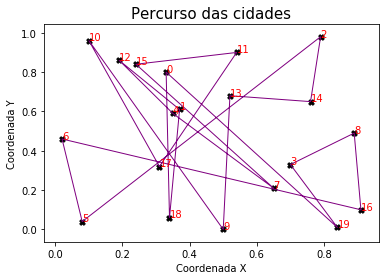

In [9]:
#plotar percurso

cord_x = []
cord_y = []
for city in populacao[0][0]:
    cord_x.append(coordenadas['x'][city])
    cord_y.append(coordenadas['y'][city])

ax = plt.subplot(111)
ax.set_xlabel("Coordenada X", fontsize = 10)
ax.set_ylabel("Coordenada Y", fontsize = 10)
ax.set_title("Percurso das cidades", fontsize = 15)
ax.scatter(cord_x, cord_y, s = 30, color = "black", marker = "X")

cord_x.append(cord_x[0])
cord_y.append(cord_y[0])

# Liga as cidades
plt.plot(cord_x, cord_y, color = "purple", linestyle="solid", linewidth=1)

# Exibe o nome das cidades no gráfico
for index, city in enumerate(populacao[0][0]):
    ax.annotate(city, (cord_x[index], cord_y[index]), color="r")

plt.show()